In [13]:
import torch
print(torch.cuda.device_count())


1


In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

#load FashionMNIST dataset
test_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)
train_size = int(0.8 * len(trainset))
validation_size = len(trainset) - train_size
train_dataset, validation_dataset = random_split(trainset, [train_size, validation_size])
trainloader = DataLoader(train_dataset, batch_size=20, shuffle=True, num_workers=4)
validationloader = DataLoader(validation_dataset, batch_size=20, shuffle=False, num_workers=4)
testloader = DataLoader(testset, batch_size=20, shuffle=False, num_workers=4)


In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda:0


## 1. multilayer perceptron (MLP)

In [ ]:
import time
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.layer_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer_stack(x)
        return x



#enable GPU
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)


#train
start_time = time.time()
epoch_losses = []
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate and store the average loss for this epoch
    avg_loss = running_loss / len(trainloader)
    epoch_losses.append(avg_loss)
    print(f'Epoch {epoch+1},  Loss: {avg_loss:.3f}')
end_time = time.time()
print('Finished Training')
total_training_time = end_time - start_time
print(f'Total Training Time: {total_training_time:.2f} seconds')

Epoch 1,  Loss: 1.194
Epoch 2,  Loss: 0.722
Epoch 3,  Loss: 0.633
Epoch 4,  Loss: 0.586
Epoch 5,  Loss: 0.555
Epoch 6,  Loss: 0.532
Epoch 7,  Loss: 0.515
Epoch 8,  Loss: 0.500
Epoch 9,  Loss: 0.488
Epoch 10,  Loss: 0.477
Epoch 11,  Loss: 0.468
Epoch 12,  Loss: 0.460
Epoch 13,  Loss: 0.452
Epoch 14,  Loss: 0.448
Epoch 15,  Loss: 0.440
Epoch 16,  Loss: 0.434
Epoch 17,  Loss: 0.429
Epoch 18,  Loss: 0.425
Epoch 19,  Loss: 0.420
Epoch 20,  Loss: 0.414
Epoch 21,  Loss: 0.411
Epoch 22,  Loss: 0.406
Epoch 23,  Loss: 0.402
Epoch 24,  Loss: 0.400
Epoch 25,  Loss: 0.396
Epoch 26,  Loss: 0.393
Epoch 27,  Loss: 0.389
Epoch 28,  Loss: 0.386
Epoch 29,  Loss: 0.383
Epoch 30,  Loss: 0.381
Epoch 31,  Loss: 0.378
Epoch 32,  Loss: 0.375


In [ ]:
# Plotting the loss vs epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), epoch_losses, label='Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.legend()
plt.show()


1.1. training Data

In [ ]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

1.2. validtion data 

In [ ]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

1.3. test data

In [ ]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

In [ ]:
import torch
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Your model evaluation code remains the same...

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=testset.classes, yticklabels=testset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# 2. Support Vector Machine


In [6]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train = trainset.data.numpy().reshape((trainset.data.shape[0], -1))
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape((testset.data.shape[0], -1))
y_test = testset.targets.numpy()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

y_pred_val = clf.predict(X_val)
print(classification_report(y_val, y_pred_val))

# Test svm
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1202
           1       0.99      0.97      0.98      1219
           2       0.83      0.83      0.83      1205
           3       0.86      0.92      0.89      1184
           4       0.82      0.85      0.83      1202
           5       0.97      0.96      0.96      1211
           6       0.75      0.66      0.70      1218
           7       0.94      0.96      0.95      1159
           8       0.95      0.97      0.96      1197
           9       0.97      0.96      0.96      1203

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

              precision    recall  f1-score   support

 T-shirt/top      0.818     0.852     0.834      1000
     Trouser      0.996     0.959     0.977      1000
    Pullover      0.793     0.815     0.804      1000
       Dress      0.862 

# 3. Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
print(classification_report(y_val, y_pred_val))
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1202
           1       1.00      0.97      0.98      1219
           2       0.79      0.82      0.80      1205
           3       0.87      0.91      0.89      1184
           4       0.77      0.83      0.80      1202
           5       0.97      0.96      0.97      1211
           6       0.75      0.60      0.67      1218
           7       0.94      0.94      0.94      1159
           8       0.96      0.97      0.96      1197
           9       0.95      0.96      0.95      1203

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

              precision    recall  f1-score   support

 T-shirt/top      0.818     0.852     0.834      1000
     Trouser      0.994     0.956     0.975      1000
    Pullover      0.767     0.802     0.784      1000
       Dress      0.869 

# 4. k-Nearest Neighbors (kNN)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
print(classification_report(y_val, y_pred_val))
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1202
           1       0.99      0.97      0.98      1219
           2       0.74      0.80      0.77      1205
           3       0.88      0.86      0.87      1184
           4       0.78      0.75      0.77      1202
           5       0.99      0.85      0.91      1211
           6       0.66      0.59      0.62      1218
           7       0.89      0.96      0.92      1159
           8       0.98      0.93      0.95      1197
           9       0.90      0.97      0.93      1203

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

              precision    recall  f1-score   support

 T-shirt/top      0.746     0.844     0.792      1000
     Trouser      0.980     0.967     0.973      1000
    Pullover      0.725     0.791     0.757      1000
       Dress      0.896 

# 5. Gradient Boosting Machines (GBM)

In [10]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
print(classification_report(y_val, y_pred_val))
y_pred_test = clf.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1202
           1       1.00      0.98      0.99      1219
           2       0.83      0.85      0.84      1205
           3       0.89      0.92      0.91      1184
           4       0.83      0.84      0.84      1202
           5       0.98      0.97      0.98      1211
           6       0.77      0.69      0.73      1218
           7       0.96      0.96      0.96      1159
           8       0.98      0.97      0.97      1197
           9       0.97      0.97      0.97      1203

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

              precision    recall  f1-score   support

 T-shirt/top      0.827     0.863     0.844      1000
     Trouser      0.995     0.971     0.983      1000
    Pullover      0.793     0.821     0.807      1000
       Dress      0.899 

# 6. Exploring Neural Network more (Convolutional Neural Networks)


# 6.1 4XConv-Layers 4xFC-Layers

In [67]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time



# Define complex network for FashionMNIST
class ComplexFashionMNISTNet2(nn.Module):
    def __init__(self):
        super(ComplexFashionMNISTNet2, self).__init__()
        # Define layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(256,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.avgpool(x)  # Global Average Pooling
        x = torch.flatten(x, 1)
        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing()
])





#enable GPU
model = ComplexFashionMNISTNet2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

start_time = time.time()
#train
LOSSES = []
EPOCHES = []
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # Calculate and store the average loss for this epoch
    avg_loss = running_loss / len(trainloader)
    epoch_losses.append(avg_loss)
    print(f'Epoch {epoch+1},  Loss: {avg_loss:.3f}')

end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time

print('Finished Training')
print(f'Total Training Time: {total_training_time:.2f} seconds')

Epoch 1,  Loss: 2.303
Epoch 2,  Loss: 2.300
Epoch 3,  Loss: 1.929
Epoch 4,  Loss: 0.989
Epoch 5,  Loss: 0.753
Epoch 6,  Loss: 0.625
Epoch 7,  Loss: 0.556
Epoch 8,  Loss: 0.497
Epoch 9,  Loss: 0.449
Epoch 10,  Loss: 0.412
Epoch 11,  Loss: 0.378
Epoch 12,  Loss: 0.353
Epoch 13,  Loss: 0.333
Epoch 14,  Loss: 0.314
Epoch 15,  Loss: 0.298
Epoch 16,  Loss: 0.282
Epoch 17,  Loss: 0.274
Epoch 18,  Loss: 0.262
Epoch 19,  Loss: 0.252
Epoch 20,  Loss: 0.242
Epoch 21,  Loss: 0.234
Epoch 22,  Loss: 0.226
Epoch 23,  Loss: 0.218
Epoch 24,  Loss: 0.208
Epoch 25,  Loss: 0.201
Epoch 26,  Loss: 0.196
Epoch 27,  Loss: 0.187
Epoch 28,  Loss: 0.179
Epoch 29,  Loss: 0.172
Epoch 30,  Loss: 0.167
Epoch 31,  Loss: 0.161
Epoch 32,  Loss: 0.153
Epoch 33,  Loss: 0.146
Epoch 34,  Loss: 0.141
Epoch 35,  Loss: 0.133
Epoch 36,  Loss: 0.130
Epoch 37,  Loss: 0.122
Epoch 38,  Loss: 0.118
Epoch 39,  Loss: 0.111
Epoch 40,  Loss: 0.104
Epoch 41,  Loss: 0.102
Epoch 42,  Loss: 0.094
Epoch 43,  Loss: 0.091
Epoch 44,  Loss: 0.0

In [68]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      1.000     1.000     1.000      4800
     Trouser      1.000     1.000     1.000      4826
    Pullover      1.000     1.000     1.000      4766
       Dress      1.000     1.000     1.000      4772
        Coat      1.000     1.000     1.000      4875
      Sandal      1.000     1.000     1.000      4796
       Shirt      1.000     1.000     1.000      4812
     Sneaker      1.000     1.000     1.000      4734
         Bag      1.000     1.000     1.000      4820
  Ankle boot      1.000     1.000     1.000      4799

    accuracy                          1.000     48000
   macro avg      1.000     1.000     1.000     48000
weighted avg      1.000     1.000     1.000     48000



In [69]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.855     0.891     0.873      1200
     Trouser      0.992     0.989     0.991      1174
    Pullover      0.875     0.895     0.885      1234
       Dress      0.928     0.938     0.933      1228
        Coat      0.880     0.891     0.885      1125
      Sandal      0.970     0.980     0.975      1204
       Shirt      0.816     0.741     0.776      1188
     Sneaker      0.963     0.957     0.960      1266
         Bag      0.979     0.977     0.978      1180
  Ankle boot      0.959     0.964     0.962      1201

    accuracy                          0.922     12000
   macro avg      0.922     0.922     0.922     12000
weighted avg      0.922     0.922     0.922     12000



In [5]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

NameError: name 'device' is not defined

In [72]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.873     0.861     0.867      1000
     Trouser      0.993     0.986     0.989      1000
    Pullover      0.880     0.881     0.881      1000
       Dress      0.915     0.915     0.915      1000
        Coat      0.856     0.888     0.872      1000
      Sandal      0.978     0.979     0.979      1000
       Shirt      0.783     0.758     0.770      1000
     Sneaker      0.953     0.973     0.963      1000
         Bag      0.974     0.984     0.979      1000
  Ankle boot      0.977     0.960     0.968      1000

    accuracy                          0.918     10000
   macro avg      0.918     0.918     0.918     10000
weighted avg      0.918     0.918     0.918     10000



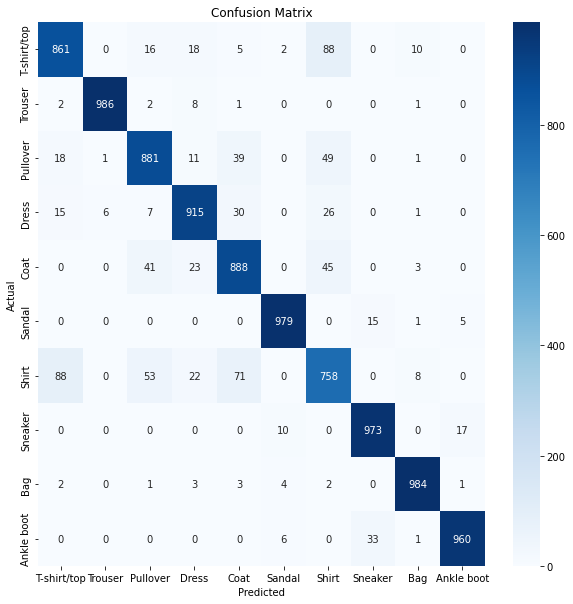

In [71]:
import torch
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Your model evaluation code remains the same...

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=testset.classes, yticklabels=testset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# 6.2 5XConv-layers 5XfC-layers

In [73]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import time



# Define complex network for FashionMNIST
class ComplexFashionMNISTNet2(nn.Module):
    def __init__(self):
        super(ComplexFashionMNISTNet2, self).__init__()
        # Define layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc1 = nn.Linear(512,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.avgpool(x)  # Global Average Pooling
        x = torch.flatten(x, 1)
        # Fully connected layers with dropout
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing()
])





#enable GPU
model = ComplexFashionMNISTNet2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

start_time = time.time()
#train
LOSSES = []
EPOCHES = []
for epoch in range(100):
    running_loss = 0.0
    print(epoch)
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 600 == 599:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 600:.3f}')
            running_loss = 0.0
    LOSSES.append(running_loss)
    EPOCHES.append(epoch)
    
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time

print('Finished Training')
print(f'Total Training Time: {total_training_time:.2f} seconds')

0
[1,   600] loss: 2.303
[1,  1200] loss: 2.303
[1,  1800] loss: 2.303
[1,  2400] loss: 2.303
1
[2,   600] loss: 2.303
[2,  1200] loss: 2.303
[2,  1800] loss: 2.303
[2,  2400] loss: 2.303
2
[3,   600] loss: 2.303
[3,  1200] loss: 2.303
[3,  1800] loss: 2.303
[3,  2400] loss: 2.303
3
[4,   600] loss: 2.303
[4,  1200] loss: 2.303
[4,  1800] loss: 2.303
[4,  2400] loss: 2.303
4
[5,   600] loss: 2.303
[5,  1200] loss: 2.303
[5,  1800] loss: 2.303
[5,  2400] loss: 2.303
5
[6,   600] loss: 2.303
[6,  1200] loss: 2.302
[6,  1800] loss: 2.303
[6,  2400] loss: 2.303
6
[7,   600] loss: 2.303
[7,  1200] loss: 2.303
[7,  1800] loss: 2.303
[7,  2400] loss: 2.303
7
[8,   600] loss: 2.302
[8,  1200] loss: 2.303
[8,  1800] loss: 2.303
[8,  2400] loss: 2.303
8
[9,   600] loss: 2.303
[9,  1200] loss: 2.303
[9,  1800] loss: 2.303
[9,  2400] loss: 2.303
9
[10,   600] loss: 2.302
[10,  1200] loss: 2.303
[10,  1800] loss: 2.303
[10,  2400] loss: 2.303
10
[11,   600] loss: 2.303
[11,  1200] loss: 2.303
[11, 

[84,  1200] loss: 0.010
[84,  1800] loss: 0.022
[84,  2400] loss: 0.016
84
[85,   600] loss: 0.016
[85,  1200] loss: 0.017
[85,  1800] loss: 0.016
[85,  2400] loss: 0.016
85
[86,   600] loss: 0.011
[86,  1200] loss: 0.013
[86,  1800] loss: 0.019
[86,  2400] loss: 0.016
86
[87,   600] loss: 0.016
[87,  1200] loss: 0.010
[87,  1800] loss: 0.019
[87,  2400] loss: 0.014
87
[88,   600] loss: 0.014
[88,  1200] loss: 0.017
[88,  1800] loss: 0.025
[88,  2400] loss: 0.013
88
[89,   600] loss: 0.008
[89,  1200] loss: 0.009
[89,  1800] loss: 0.009
[89,  2400] loss: 0.015
89
[90,   600] loss: 0.013
[90,  1200] loss: 0.011
[90,  1800] loss: 0.008
[90,  2400] loss: 0.008
90
[91,   600] loss: 0.006
[91,  1200] loss: 0.010
[91,  1800] loss: 0.014
[91,  2400] loss: 0.027
91
[92,   600] loss: 0.012
[92,  1200] loss: 0.013
[92,  1800] loss: 0.018
[92,  2400] loss: 0.012
92
[93,   600] loss: 0.006
[93,  1200] loss: 0.011
[93,  1800] loss: 0.010
[93,  2400] loss: 0.013
93
[94,   600] loss: 0.013
[94,  1200

In [42]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.997     0.984     0.990      4795
     Trouser      1.000     1.000     1.000      4832
    Pullover      0.998     0.999     0.998      4798
       Dress      1.000     0.996     0.998      4838
        Coat      0.997     0.999     0.998      4761
      Sandal      1.000     1.000     1.000      4807
       Shirt      0.983     0.996     0.990      4803
     Sneaker      1.000     1.000     1.000      4797
         Bag      1.000     1.000     1.000      4804
  Ankle boot      1.000     1.000     1.000      4765

    accuracy                          0.997     48000
   macro avg      0.997     0.997     0.997     48000
weighted avg      0.997     0.997     0.997     48000



In [43]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.870     0.828     0.849      1205
     Trouser      0.995     0.983     0.989      1168
    Pullover      0.875     0.867     0.871      1202
       Dress      0.916     0.906     0.911      1162
        Coat      0.884     0.847     0.865      1239
      Sandal      0.977     0.986     0.981      1193
       Shirt      0.711     0.803     0.754      1197
     Sneaker      0.970     0.953     0.961      1203
         Bag      0.988     0.975     0.981      1196
  Ankle boot      0.961     0.974     0.967      1235

    accuracy                          0.912     12000
   macro avg      0.915     0.912     0.913     12000
weighted avg      0.914     0.912     0.913     12000



In [45]:
model.eval()
from sklearn.metrics import classification_report, accuracy_score

y_pred= []
y_true=[]
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(classification_report(y_true, y_pred, target_names=testset.classes, digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.877     0.833     0.854      1000
     Trouser      0.995     0.974     0.984      1000
    Pullover      0.873     0.867     0.870      1000
       Dress      0.929     0.899     0.914      1000
        Coat      0.862     0.878     0.870      1000
      Sandal      0.976     0.982     0.979      1000
       Shirt      0.726     0.799     0.761      1000
     Sneaker      0.959     0.962     0.961      1000
         Bag      0.986     0.966     0.976      1000
  Ankle boot      0.964     0.966     0.965      1000

    accuracy                          0.913     10000
   macro avg      0.915     0.913     0.913     10000
weighted avg      0.915     0.913     0.913     10000



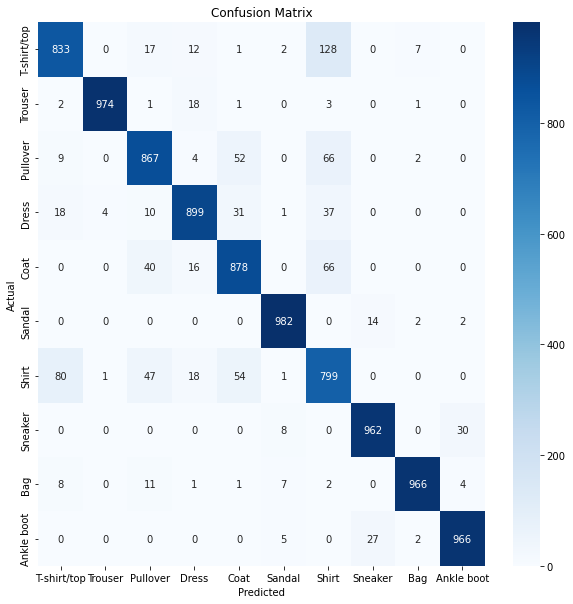

In [46]:
import torch
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Your model evaluation code remains the same...

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualization of the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=testset.classes, yticklabels=testset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
